In [1]:
import os
os.getcwd()

'/home/zhaoming/Qin_Liu/DDPG'

In [7]:
import pandas as pd
load = pd.read_csv('/home/zhaoming/Liu_Qin/DDPG/Data/Base_load_update.csv')
load.index = pd.to_datetime(load['localminute'])
load.drop(columns='localminute',inplace=True)

In [8]:
load

,27,142,387,558,914,950,1222,1240,1417,2096,...,3700,3996,4283,4550,5058,5587,5679,5982,5997,9053
localminute,,,,,,,,,,,,,,,,,,,,,
2019-05-01 00:00:00,0.349,0.066,0.061,0.164,0.008,0.190,0.013,0.357,0.036,0.730,...,0.155,0.541,0.122,0.137,0.075,0.371,0.050,0.042,0.272,0.010
2019-05-01 00:01:00,0.349,0.066,0.061,0.163,0.008,0.181,0.013,0.356,0.036,0.730,...,0.153,0.541,0.023,0.136,0.075,0.030,0.050,0.041,0.106,0.011
2019-05-01 00:02:00,0.349,0.066,0.060,0.164,0.008,0.179,0.013,0.358,0.036,0.729,...,0.152,0.541,0.021,0.137,1.263,0.024,0.050,0.041,0.105,0.054
2019-05-01 00:03:00,0.352,0.067,0.060,0.163,0.007,0.180,0.013,0.357,0.036,0.729,...,0.150,0.417,0.020,0.137,1.335,0.024,0.049,0.041,0.066,0.334
2019-05-01 00:04:00,0.368,0.066,0.061,0.162,0.007,0.179,0.011,0.359,0.036,0.730,...,0.148,0.098,0.021,0.135,1.334,0.025,0.049,0.041,0.037,0.330
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-10-31 23:55:00,0.680,0.400,0.149,0.156,0.006,0.195,0.072,0.196,0.039,0.329,...,0.021,0.603,0.096,0.032,1.634,0.022,0.649,0.026,0.775,0.001
2019-10-31 23:56:00,0.627,0.399,0.149,0.154,0.006,0.194,0.150,0.198,0.039,0.329,...,0.021,0.609,0.096,0.039,1.634,0.022,0.186,0.026,0.702,0.001
2019-10-31 23:57:00,0.155,0.399,0.150,0.152,0.006,0.195,0.142,0.196,0.039,0.327,...,0.021,0.611,0.095,0.036,1.635,0.022,0.186,0.026,0.711,0.001


In [9]:
load_hourly = pd.DataFrame(index=load.index[::60])

In [10]:
index=0
for column in load.columns:
    load_hourly[index] = load[column][::60]
    for i in range(59):
        load_hourly[index] += load[column][(i+1)::60].values
    index+=1

In [17]:
load_hourly.to_csv('/home/zhaoming/Liu_Qin/load_hourly.csv')

In [108]:
import pandas as pd
price = pd.read_csv('/home/zhaoming/Liu_Qin/RTP.csv')

In [117]:
price1 = price[price['row_is_current']==True]

In [162]:
price1['datetime_beginning_ept'] = pd.to_datetime(price1['datetime_beginning_ept'])

<ipython-input-162-d7355d46a9dc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1['datetime_beginning_ept'] = pd.to_datetime(price1['datetime_beginning_ept'])


In [166]:
price1[2210:]['datetime_beginning_ept'] = price1[2210:]['datetime_beginning_ept'] + pd.Timedelta('1h')

<ipython-input-166-695c15afdb03>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price1[2210:]['datetime_beginning_ept'] = price1[2210:]['datetime_beginning_ept'] + pd.Timedelta('1h')


In [172]:
price1.to_csv('/home/zhaoming/Liu_Qin/price.csv')

In [173]:
RTP = pd.DataFrame(index=pd.to_datetime(price1['datetime_beginning_ept']))

In [174]:
RTP['price'] = price1['total_lmp_rt'].values

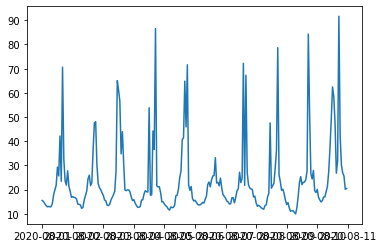

In [175]:
import matplotlib.pyplot as plt

plt.plot(RTP['price'][0:240])
plt.show()

In [176]:
#判断时间是不是连续变化
last_time = None
for time in RTP.index:
    if last_time != None:
        if time-last_time!=pd.Timedelta('1h'):
            break
    last_time = time
print(time)

2020-11-15 01:00:00


In [1]:
import pandas as pd
price = pd.read_csv('/home/zhaoming/Liu_Qin/price.csv',index_col=0)
load_hourly = pd.read_csv('/home/zhaoming/Liu_Qin/load_hourly.csv',index_col=0)
price.index = pd.to_datetime(price['datetime_beginning_ept'])

In [2]:
price

,datetime_beginning_utc,datetime_beginning_ept,pnode_id,pnode_name,voltage,equipment,type,zone,system_energy_price_rt,total_lmp_rt,congestion_price_rt,marginal_loss_price_rt,row_is_current,version_nbr
datetime_beginning_ept,,,,,,,,,,,,,,
2020-08-01 00:00:00,8/1/2020 4:00:00 AM,2020-08-01 00:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,15.48,15.492029,0.000000,0.008696,True,1
2020-08-01 01:00:00,8/1/2020 5:00:00 AM,2020-08-01 01:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,15.04,15.053449,0.000000,0.010116,True,1
2020-08-01 02:00:00,8/1/2020 6:00:00 AM,2020-08-01 02:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,14.20,14.208208,0.000000,0.012375,True,1
2020-08-01 03:00:00,8/1/2020 7:00:00 AM,2020-08-01 03:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,13.43,13.439615,0.000000,0.009615,True,1
2020-08-01 04:00:00,8/1/2020 8:00:00 AM,2020-08-01 04:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,12.86,12.872694,0.000000,0.008527,True,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-14 21:00:00,11/15/2020 1:00:00 AM,2020-11-14 21:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,19.40,19.410371,0.001998,0.006707,True,1
2020-11-14 22:00:00,11/15/2020 2:00:00 AM,2020-11-14 22:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,17.89,17.900052,0.007688,0.005698,True,1
2020-11-14 23:00:00,11/15/2020 3:00:00 AM,2020-11-14 23:00:00,1,PJM-RTO,NaN,NaN,ZONE,NaN,16.72,16.727211,0.006204,0.006007,True,1


In [7]:
load_hourly.index = pd.to_datetime(load_hourly.index)

In [8]:
#data for training (102 days)
#load: 7.22-10.31 price: 8.1-11.10
data_train = load_hourly["2019-07-22 00:00:00":"2019-10-31 23:00:00"]
data_train.index = price["2020-08-01 00:00:00":"2020-11-10 23:00:00"].index
data_train.index.rename('time',inplace=True)

In [9]:
data_train['price'] = price["2020-08-01 00:00:00":"2020-11-10 23:00:00"]['total_lmp_rt'].values

<ipython-input-9-a96198ecc4bc>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_train['price'] = price["2020-08-01 00:00:00":"2020-11-10 23:00:00"]['total_lmp_rt'].values


In [12]:
#data for testing (4 days)
#load: 7.18-7.21 price: 11.11-11.14
data_test = load_hourly["2019-07-18 00:00:00":"2019-7-21 23:00:00"]
data_test.index = price["2020-11-11 00:00:00":"2020-11-14 23:00:00"].index
data_test['price'] = price["2020-11-11 00:00:00":"2020-11-14 23:00:00"]['total_lmp_rt'].values
data_test.index.rename('time',inplace=True)

<ipython-input-12-bd5b0c9151a9>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_test['price'] = price["2020-11-11 00:00:00":"2020-11-14 23:00:00"]['total_lmp_rt'].values


In [7]:
data_train.to_csv('/home/zhaoming/Liu_Qin/data_train.csv')
data_test.to_csv('/home/zhaoming/Liu_Qin/data_test.csv')

In [1]:
import pandas as pd
data_train = pd.read_csv('/home/zhaoming/Liu_Qin/data_train.csv',index_col=0)
data_test = pd.read_csv('/home/zhaoming/Liu_Qin/data_test.csv',index_col=0)

In [6]:
data_train

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,price
time,,,,,,,,,,,,,,,,,,,,,
2020-08-01 00:00:00,0.25437,0.18302,0.07954,0.03631,0.00297,0.15615,0.05495,0.12732,0.44323,0.13353,...,0.32951,0.04406,0.11690,0.04712,0.16815,0.10933,0.01663,0.39480,0.00081,1.549203
2020-08-01 01:00:00,0.13682,0.18078,0.04119,0.07753,0.00314,0.12454,0.05307,0.12720,0.09585,0.12832,...,0.77995,0.03081,0.08376,0.04688,0.17069,0.13162,0.01685,0.42350,0.00124,1.505345
2020-08-01 02:00:00,0.15573,0.19580,0.08797,0.04607,0.00298,0.12771,0.04530,0.12773,0.02319,0.13566,...,0.54956,0.06668,0.07209,0.04681,0.16250,0.11343,0.01694,0.42929,0.00092,1.420821
2020-08-01 03:00:00,0.20933,0.19572,0.04744,0.06744,0.00290,0.12624,0.05702,0.12807,0.02311,0.13253,...,0.36601,0.05261,0.06691,0.15578,0.16672,0.11062,0.01693,0.40104,0.00123,1.343962
2020-08-01 04:00:00,0.12542,0.19491,0.07789,0.05363,0.00302,0.12772,0.04905,0.12775,0.02342,0.12247,...,0.36535,0.03067,0.06586,1.35406,0.16940,0.21501,0.01681,0.38746,0.00967,1.287269
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-11-10 19:00:00,0.11982,0.25940,0.06010,0.03362,0.44227,0.11807,0.11004,0.42200,0.24541,0.18664,...,0.25386,0.16628,0.66105,0.96528,0.12184,0.27725,0.22410,0.33356,0.04926,2.191618
2020-11-10 20:00:00,0.09077,0.30409,0.04671,0.09594,0.06646,0.11828,0.05965,0.39693,0.12208,0.16388,...,0.24212,1.54915,0.49148,0.08900,0.13876,0.22582,0.76663,0.32911,0.00056,1.772239
2020-11-10 21:00:00,0.27723,0.28293,0.08836,0.05084,0.00274,0.11777,0.05731,0.40090,0.31379,0.14353,...,0.29639,0.39705,1.24289,0.04440,0.12383,0.23341,0.04347,0.66607,0.01845,1.853122


In [3]:
data_train['price'] = data_train['price']/10
data_test['price'] = data_test['price']/10

In [5]:
data_train[[str(i) for i in range(25)]] = data_train[[str(i) for i in range(25)]]/100
data_test[[str(i) for i in range(25)]] = data_test[[str(i) for i in range(25)]]/100

In [24]:
[str(i) for i in range(25)]

['0',
 '1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24']

In [3]:
Lsum = data['0']
for i in range(1,25):
    Lsum += data[str(i)]

In [22]:
Lsum.max()

1143.2739999999997

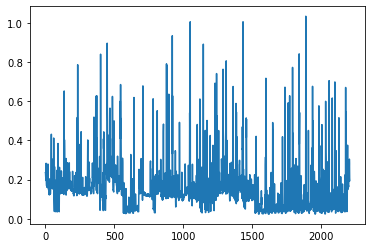

In [16]:
import matplotlib.pyplot as plt
plt.plot(data['1'].values/100)
plt.show()

In [20]:
for i in range(1,25):
    print(data[str(i)].mean())

14.644647644927536
8.909509963768116
14.45876902173913
9.051903079710144
16.88816304347826
17.6052830615942
26.04417481884058
12.288028532608696
26.281550271739132
12.99839855072464
5.986202898550725
12.39810643115942
25.610870923913044
23.33823143115942
3.766015398550725
26.91716530797101
20.56313134057971
15.006273550724638
18.877272644927533
26.001515851449273
12.175817028985506
20.990283967391303
37.944577898550726
4.290120471014493


In [21]:
for i in range(1,25):
    print(data[str(i)].max())

103.426
139.95399999999998
202.861
280.7989999999999
209.46599999999992
322.277
280.622
260.66200000000003
69.219
203.201
190.07199999999992
92.12400000000002
228.577
134.615
76.22699999999998
158.885
294.932
199.543
160.6459999999999
317.926
56.11599999999999
198.307
224.825
102.668


In [9]:
import numpy as np
action = np.array([1,1])
fixed_price = 3
users_c = np.array([1,2,3,4,5,6])
users_d = 10*np.array([1.1,2.2,3.3,4.4,5.5,6.6])
action[1]*(action[0]+fixed_price-users_c)/(action[0]+action[1]*users_d)

array([ 0.25      ,  0.08695652,  0.02941176,  0.        , -0.01785714,
       -0.02985075])

In [10]:
users_c**2

array([ 1,  4,  9, 16, 25, 36])